# Actor-Critic


## 1 env & utils

In [1]:
import gym
import sys
import numpy as np
import torch
import matplotlib.pyplot as plt
sys.path.append('.')
sys.path.append('../Online RL/actor-critic')

torch.manual_seed(28)
%matplotlib inline

In [2]:
EPOCHS = 1000
task = "ALE/Pong-v5"

In [3]:
import subprocess
import os
import gym

# 启动 Xvfb
proc = subprocess.Popen(['Xvfb', ':99', '-screen', '0', '1400x900x24'])
os.environ['DISPLAY'] = ':99'

# 检查 Xvfb 是否启动成功
if proc.poll() is None:
    print("Xvfb started successfully.")
else:
    print("Failed to start Xvfb.")

# 运行 Gym 环境代码
try:
    env = gym.make(task, render_mode='rgb_array')
    env.reset()
    for _ in range(10):
        env.render()
        env.step(env.action_space.sample())  # 随机采取动作
    env.close()
except Exception as e:
    print(f"Failed to initialize environment or render: {e}")

# 终止 Xvfb
proc.terminate()


Xvfb started successfully.


_XSERVTransmkdir: Mode of /tmp/.X11-unix should be set to 1777
_XSERVTransSocketCreateListener: failed to bind listener
_XSERVTransSocketUNIXCreateListener: ...SocketCreateListener() failed
_XSERVTransMakeAllCOTSServerListeners: failed to create listener for unix
A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]
/root/miniconda3/envs/rl/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:289: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(
/root/miniconda3/envs/rl/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [4]:
def move_avg(a,n=100,mode="valid"):	
    return(np.convolve(a, np.ones((n,))/n, mode=mode))	
    
def plot_reward(model_name, rew): 
    plt.figure(figsize=[15, 6])
    
    plt.subplot(1,2,1)
    X = np.linspace(1,len(rew),len(rew))
    plt.plot(X, rew)
    plt.xlabel('epochs')
    plt.title(model_name)

    plt.subplot(1,2,2)
    rew = move_avg(rew)
    X = np.linspace(1,len(rew),len(rew))
    plt.plot(X, rew)
    plt.xlabel('epochs')
    plt.title(model_name)
    plt.show()

## 2 Actor-Critic

Based on PolicyGradient, Actor-Critic was born. 

This is essentially a method that combines Policy Gradient (Actor) and Function Approximation (Critic). The Actor selects behaviors based on probability, the Critic evaluates the score of the behavior based on the Actor's behavior, and the Actor modifies the probability of selecting the behavior based on the Critic's score.

Advantages: It can be updated in a single step, and the training efficiency is faster than Policy Gradient.

Disadvantages: It depends on the value judgment of the Critic, but it is difficult for the Critic to converge. Coupled with the update of the Actor, it is even more difficult to converge.

In [5]:
from Trainer import AC_Trainer

ACtrainer = AC_Trainer(task, EPOCHS)

 State Dimensions :  (210, 160, 3)
 Action Dimensions :  6
AC_net(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(8, 8), stride=(4, 4))
    (1): ReLU(inplace=True)
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU(inplace=True)
  )
  (feature): Sequential(
    (0): Linear(in_features=22528, out_features=256, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU(inplace=True)
  )
  (act_layer): Sequential(
    (0): Linear(in_features=64, out_features=6, bias=True)
    (1): Softmax(dim=0)
  )
  (val_layer): Linear(in_features=64, out_features=1, bias=True)
)


In [6]:
# ACtrainer.run()
# plot_reward('Actor-Critic_reward', ACtrainer.reward_list)

## 3 DDPG

Deep Deterministic Policy Gradient (DDPG) combines the essence of actor-critic single-step updates and DQN value-based approaches, synthesizing them into a new algorithm.
 - **Deep**: Incorporates the value-based concept, utilizing an experience replay buffer and two identical deep neural networks to facilitate learning.
 - **Deterministic Policy Gradient**: Unlike Policy Gradient methods that generate a distribution and sample from it, DDPG directly outputs a single action value in continuous action spaces.

In [7]:
EPOCHS = 500
task = 'LunarLanderContinuous-v2'

In [8]:
from Trainer import DDPG_Trainer

DDPGtrainer = DDPG_Trainer(task, EPOCHS)

 State Dimensions :  8
 Action Dimensions :  2


In [9]:
DDPGtrainer.run()

TypeError: unsupported operand type(s) for ^=: 'float' and 'float'

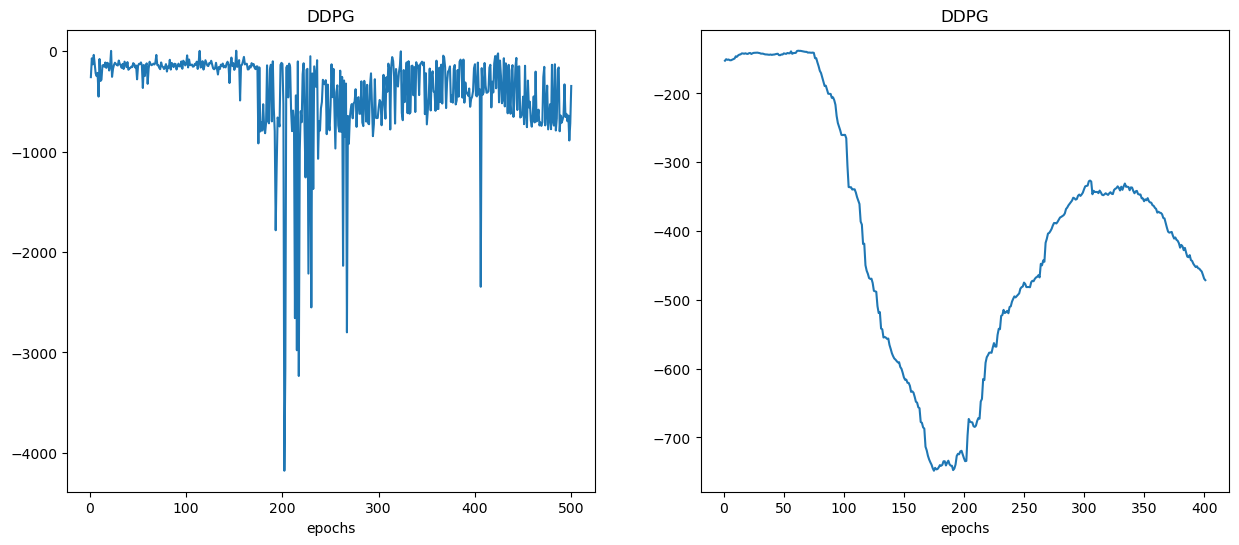

In [ ]:
plot_reward('DDPG', DDPGtrainer.reward_list)